# Suvendu Bista
**Course:** Advanced Big Data and Data Mining (MSCS-634-B01),
**Lab Title:** Data Visualization and Statistical Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
weather_df = pd.read_csv('../csv/weather.csv')

# Display first 5 rows
weather_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


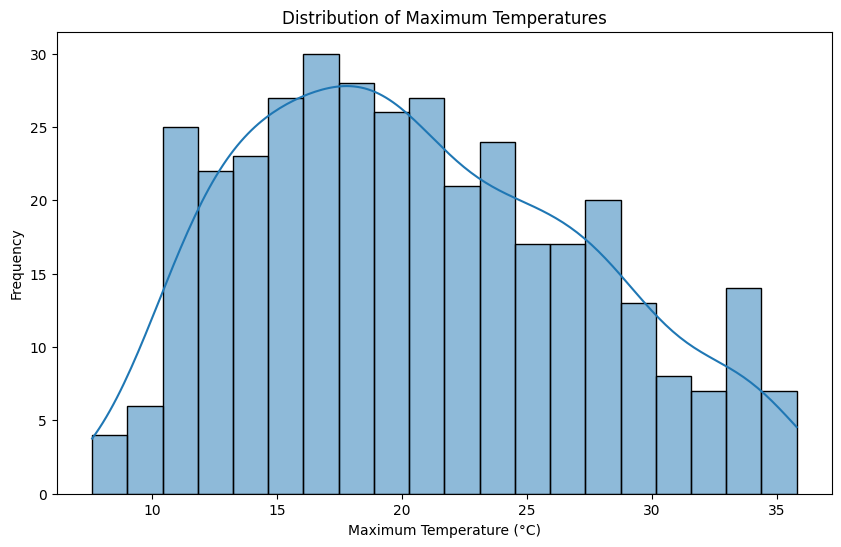

In [36]:
plt.figure(figsize=(10,6))
sns.histplot(data=weather_df, x='MaxTemp', bins=20, kde=True)
plt.title('Distribution of Maximum Temperatures')
plt.xlabel('Maximum Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

### Insight  
The maximum temperatures follow a roughly normal distribution with the most days having max temps between 15 to 25°C. There are some extreme values on both the low and high ends.

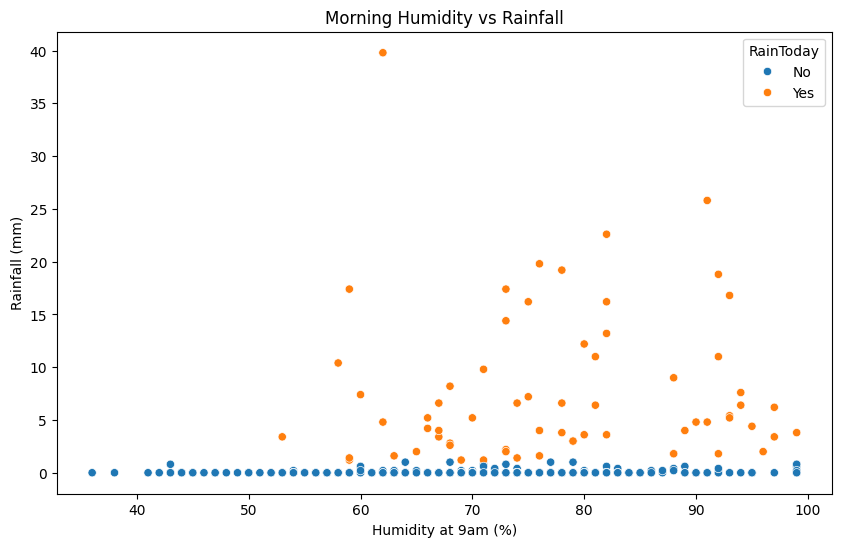

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=weather_df, x='Humidity9am', y='Rainfall', hue='RainToday')
plt.title('Morning Humidity vs Rainfall')
plt.xlabel('Humidity at 9am (%)')
plt.ylabel('Rainfall (mm)')
plt.show()

### Insight
There appears to be a relationship between higher morning humidity and increased likelihood of rain. Most rainy days occur when morning humidity is above 60%.



In [48]:
# Check for missing values
print("Missing values before handling:")
print(weather_df.isnull().sum())

# Fill missing wind direction with mode
weather_df['WindDir9am'] = weather_df['WindDir9am'].fillna(weather_df['WindDir9am'].mode()[0])
weather_df['WindDir3pm'] = weather_df['WindDir3pm'].fillna(weather_df['WindDir3pm'].mode()[0])

# Fill missing wind speeds with median
weather_df['WindSpeed9am'] = weather_df['WindSpeed9am'].fillna(weather_df['WindSpeed9am'].median())
weather_df['WindSpeed3pm'] = weather_df['WindSpeed3pm'].fillna(weather_df['WindSpeed3pm'].median())

print("\nMissing values after handling:")
print(weather_df.isnull().sum())


Missing values before handling:
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         3
WindGustDir      3
WindGustSpeed    2
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

Missing values after handling:
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         3
WindGustDir      3
WindGustSpeed    2
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64


In [49]:
# Calculate IQR for Rainfall
Q1 = weather_df['Rainfall'].quantile(0.25)
Q3 = weather_df['Rainfall'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = weather_df[(weather_df['Rainfall'] < (Q1 - 1.5*IQR)) | 
                     (weather_df['Rainfall'] > (Q3 + 1.5*IQR))]

print(f"Number of outliers in Rainfall: {len(outliers)}")

# Remove outliers
weather_df_clean = weather_df[~weather_df.index.isin(outliers.index)]

Number of outliers in Rainfall: 81


In [52]:
# Drop less relevant columns
reduced_df = weather_df_clean.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis=1)

# Take a 20% sample
sampled_df = reduced_df.sample(frac=0.2)
sampled_df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
26,13.3,22.2,0.2,ENE,39.0,E,E,20.0,17,70,55,1021.0,1018.6,16.5,21.2,No,0.0,No
181,-1.8,14.8,0.0,N,28.0,E,N,2.0,19,80,40,1024.2,1020.5,5.3,13.9,No,0.0,No
329,3.2,18.7,0.0,N,31.0,E,NNW,4.0,13,70,32,1032.2,1026.9,11.0,18.1,No,0.0,No
343,0.5,20.0,0.0,NNW,31.0,S,N,2.0,9,69,22,1026.2,1024.2,8.1,18.8,No,0.0,No
229,5.4,15.5,0.0,NNE,20.0,SSW,NNE,7.0,7,80,58,1028.6,1025.5,9.4,14.9,No,0.0,No


In [54]:
from sklearn.preprocessing import MinMaxScaler

# Make a copy to avoid SettingWithCopyWarning
weather_df_clean = weather_df_clean.copy()

# Scale temperature columns
scaler = MinMaxScaler()
weather_df_clean[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']] = scaler.fit_transform(
    weather_df_clean[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']])

# Discretize rainfall into categories
bins = [-1, 0, 5, 10, 20, 50, 100]
labels = ['No rain', 'Light', 'Moderate', 'Heavy', 'Very heavy', 'Extreme']
weather_df_clean['RainLevel'] = pd.cut(weather_df_clean['Rainfall'], bins=bins, labels=labels)

# Show sample of transformed data
weather_df_clean[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'Rainfall', 'RainLevel']].head()


,MinTemp,MaxTemp,Temp9am,Temp3pm,Rainfall,RainLevel
0,0.507634,0.592199,0.581301,0.629252,0.0,No rain
5,0.438931,0.329787,0.439024,0.329932,0.0,No rain
6,0.435115,0.375887,0.500000,0.414966,0.2,Light
7,0.519084,0.333333,0.487805,0.353741,0.0,No rain
8,0.538168,0.421986,0.569106,0.469388,0.0,No rain


In [55]:
# Dataset info
weather_df.info()

# Descriptive statistics
weather_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     366 non-null    object 
 8   WindDir3pm     366 non-null    object 
 9   WindSpeed9am   366 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.601093,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.883703,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [56]:
# Calculate central tendency for key variables
central_tendency = pd.DataFrame({
    'MinTemp': [weather_df['MinTemp'].min(), weather_df['MinTemp'].max(), 
               weather_df['MinTemp'].mean(), weather_df['MinTemp'].median(), 
               weather_df['MinTemp'].mode()[0]],
    'MaxTemp': [weather_df['MaxTemp'].min(), weather_df['MaxTemp'].max(), 
               weather_df['MaxTemp'].mean(), weather_df['MaxTemp'].median(), 
               weather_df['MaxTemp'].mode()[0]],
    'Rainfall': [weather_df['Rainfall'].min(), weather_df['Rainfall'].max(), 
                weather_df['Rainfall'].mean(), weather_df['Rainfall'].median(), 
                weather_df['Rainfall'].mode()[0]]
}, index=['Minimum', 'Maximum', 'Mean', 'Median', 'Mode'])

central_tendency

,MinTemp,MaxTemp,Rainfall
Minimum,-5.300000,7.600000,0.000000
Maximum,20.900000,35.800000,39.800000
Mean,7.265574,20.550273,1.428415
Median,7.450000,19.650000,0.000000
Mode,0.500000,11.600000,0.000000


In [57]:
# Calculate dispersion for key variables
dispersion = pd.DataFrame({
    'MinTemp': [weather_df['MinTemp'].max() - weather_df['MinTemp'].min(),
               weather_df['MinTemp'].quantile(0.25),
               weather_df['MinTemp'].quantile(0.75),
               weather_df['MinTemp'].quantile(0.75) - weather_df['MinTemp'].quantile(0.25),
               weather_df['MinTemp'].var(),
               weather_df['MinTemp'].std()],
    'MaxTemp': [weather_df['MaxTemp'].max() - weather_df['MaxTemp'].min(),
               weather_df['MaxTemp'].quantile(0.25),
               weather_df['MaxTemp'].quantile(0.75),
               weather_df['MaxTemp'].quantile(0.75) - weather_df['MaxTemp'].quantile(0.25),
               weather_df['MaxTemp'].var(),
               weather_df['MaxTemp'].std()],
    'Rainfall': [weather_df['Rainfall'].max() - weather_df['Rainfall'].min(),
                weather_df['Rainfall'].quantile(0.25),
                weather_df['Rainfall'].quantile(0.75),
                weather_df['Rainfall'].quantile(0.75) - weather_df['Rainfall'].quantile(0.25),
                weather_df['Rainfall'].var(),
                weather_df['Rainfall'].std()]
}, index=['Range', 'Q1', 'Q3', 'IQR', 'Variance', 'Standard Deviation'])

dispersion

,MinTemp,MaxTemp,Rainfall
Range,26.200000,28.200000,39.800000
Q1,2.300000,15.025000,0.000000
Q3,12.500000,25.500000,0.200000
IQR,10.200000,10.475000,0.200000
Variance,36.310264,44.763000,17.857382
Standard Deviation,6.025800,6.690516,4.225800


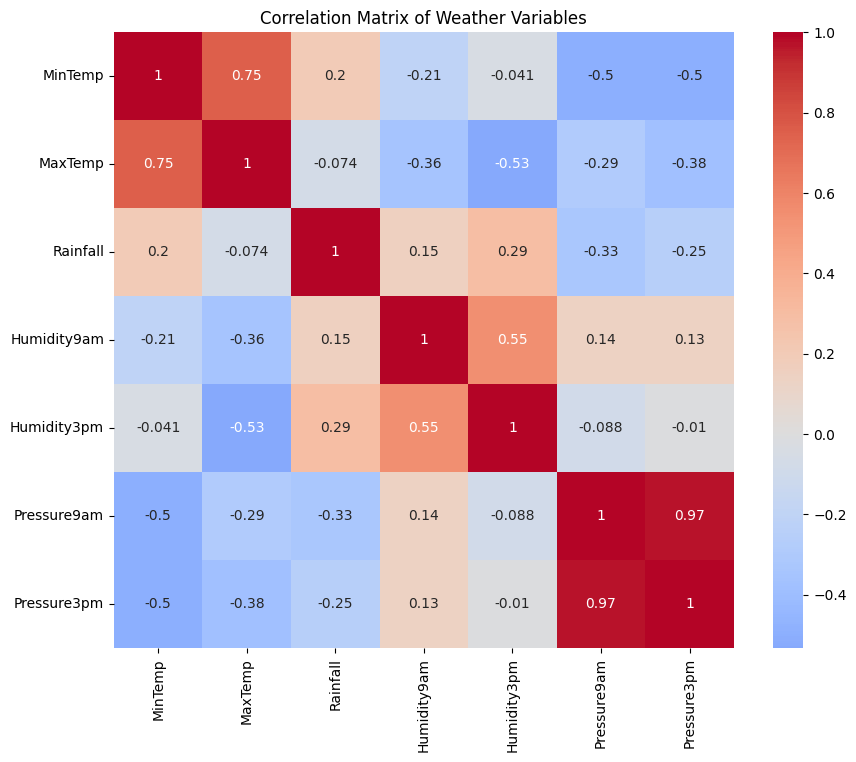

In [58]:
# Calculate correlation matrix
correlation_matrix = weather_df[['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 
                                'Humidity3pm', 'Pressure9am', 'Pressure3pm']].corr()

# Visualize correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Weather Variables')
plt.show()